In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

In [3]:
customer = pd.read_csv('customer_churn.csv')
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
customer.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

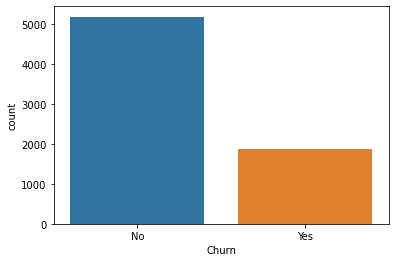

In [8]:
sns.countplot(x='Churn', data=customer)

In [9]:
customer.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
customer.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [26]:
selected_columns = customer[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'Churn']]
selected_columns.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes
3,45,0,42.30,No
4,2,0,70.70,Yes


In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
selected_columns.loc[:, 'Churn'] = le.fit_transform(selected_columns['Churn'])
selected_columns.head()

/var/folders/yg/vf04jxqn61n13pv3jz4p4l_h0000gn/T/ipykernel_3832/3947053726.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns.loc[:, 'Churn'] = le.fit_transform(selected_columns['Churn'])


,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,0
1,34,0,56.95,0
2,2,0,53.85,1
3,45,0,42.30,0
4,2,0,70.70,1


In [28]:
# X/y split
y = selected_columns['Churn']
X = selected_columns.drop(['Churn'], axis=1)

In [29]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [30]:
X

,tenure,SeniorCitizen,MonthlyCharges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70
...,...,...,...
7038,24,0,84.80
7039,72,0,103.20
7040,11,0,29.60
7041,4,1,74.40


In [32]:
X.columns

Index(['tenure', 'SeniorCitizen', 'MonthlyCharges'], dtype='object')

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 3), (1409, 3), (5634,), (1409,))

In [37]:
transformer = StandardScaler()
transformer.fit(X_train)
X_train_scaled_np = transformer.transform(X_train)
X_train_scaled_np

array([[-4.65683364e-01, -4.37749204e-01, -4.73723375e-04],
       [ 8.85536787e-01, -4.37749204e-01,  1.07475386e+00],
       [-1.28460467e+00, -4.37749204e-01, -1.37649913e+00],
       ...,
       [-8.34197950e-01, -4.37749204e-01, -1.45294499e+00],
       [-8.34197950e-01,  2.28441306e+00,  1.14953785e+00],
       [-2.60953038e-01, -4.37749204e-01, -1.49781538e+00]])

In [38]:
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index)
X_train_scaled

,tenure,SeniorCitizen,MonthlyCharges
2142,-0.465683,-0.437749,-0.000474
1623,0.885537,-0.437749,1.074754
6074,-1.284605,-0.437749,-1.376499
1362,-1.161766,-0.437749,0.177346
6754,-1.325551,-0.437749,-0.098524
...,...,...,...
3772,-1.284605,-0.437749,1.001632
5191,-0.383791,-0.437749,0.872006
5226,-0.834198,-0.437749,-1.452945
5390,-0.834198,2.284413,1.149538


In [39]:
X_test_scaled_np = transformer.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled_np, columns= X_train.columns, index=X_test.index)
X_test_scaled

,tenure,SeniorCitizen,MonthlyCharges
185,-1.284605,-0.437749,-1.331629
2715,0.353238,-0.437749,-1.316672
3825,0.803645,-0.437749,-1.512772
1807,-1.284605,-0.437749,0.381756
132,1.417836,-0.437749,-0.475768
...,...,...,...
6366,1.294997,-0.437749,0.114195
315,0.762699,-0.437749,1.501854
2439,-0.629468,-0.437749,-1.494492
5002,1.499728,-0.437749,-0.695134


In [40]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [41]:
lr.n_iter_

array([9], dtype=int32)

In [42]:
predictions_train = lr.predict(X_train_scaled)
predictions_train

array([0, 0, 0, ..., 0, 1, 0])

In [43]:
predictions_test = lr.predict(X_test_scaled)
predictions_test

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
print("The accuracy of the model in the TRAIN set is: {:.2f}".format(lr.score(X_train_scaled, y_train)))

The accuracy of the model in the TRAIN set is: 0.79


In [45]:
print("The accuracy of the model in the TEST set is: {:.2f}".format(lr.score(X_test_scaled, y_test)))

The accuracy of the model in the TEST set is: 0.81


Even a simple model will give us more than 70% accuracy. Why?

If the classes in your dataset are imbalanced, meaning that one class has significantly more samples than the other, a simple model might predict the majority class most of the time and still achieve high accuracy. Accuracy alone may not be a reliable metric in such cases, as it can be misleading. It is important to consider other evaluation metrics, such as precision, recall, and F1-score, to assess the model's performance more comprehensively.

In [47]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix


In [48]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)


In [49]:
lr_smote = LogisticRegression(random_state=0, solver='lbfgs')
lr_smote.fit(X_train_smote, y_train_smote)


LogisticRegression(random_state=0)

In [50]:
y_pred = lr_smote.predict(X_test_scaled)


In [51]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[762 274]
 [ 85 288]]
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1036
           1       0.51      0.77      0.62       373

    accuracy                           0.75      1409
   macro avg       0.71      0.75      0.71      1409
weighted avg       0.80      0.75      0.76      1409



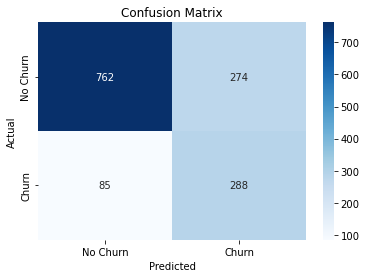

In [52]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels, title, and ticks
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['No Churn', 'Churn'])
plt.yticks([0.5, 1.5], ['No Churn', 'Churn'])

# Display the plot
plt.show()

In [53]:
from imblearn.under_sampling import TomekLinks


In [54]:
tomek = TomekLinks()
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train_scaled, y_train)


In [55]:
lr_tomek = LogisticRegression(random_state=0, solver='lbfgs')
lr_tomek.fit(X_train_tomek, y_train_tomek)


LogisticRegression(random_state=0)

In [56]:
y_pred_tomek = lr_tomek.predict(X_test_scaled)


In [57]:
print(confusion_matrix(y_test, y_pred_tomek))
print(classification_report(y_test, y_pred_tomek))


[[913 123]
 [168 205]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1036
           1       0.62      0.55      0.58       373

    accuracy                           0.79      1409
   macro avg       0.73      0.72      0.72      1409
weighted avg       0.79      0.79      0.79      1409



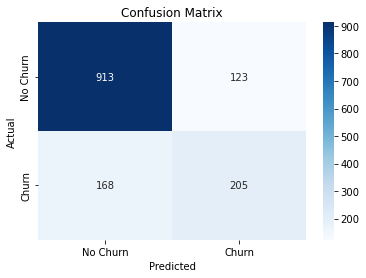

In [59]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_tomek)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels, title, and ticks
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks([0.5, 1.5], ['No Churn', 'Churn'])
plt.yticks([0.5, 1.5], ['No Churn', 'Churn'])

# Display the plot
plt.show()